In [103]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# TS Plotting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

# TS Modeling
from statsmodels.tsa.arima_model import ARMA, ARIMA
import statsmodels.api as sm

In [2]:
df = pd.read_csv('data/extracted/crime-data-from-2010-to-present.csv')

In [3]:
# removing empty time stamp from Date Reported and Date Ocurred
df["Date Reported"] = df["Date Reported"].str.replace('T00:00:00', '')
df["Date Occurred"] = df["Date Occurred"].str.replace('T00:00:00', '')

In [4]:
s = pd.to_datetime(df['Date Occurred'], format= '%Y-%m-%d')
df = s.groupby(s.dt.floor('d')).size().reset_index(name='count')
print (df)

     Date Occurred  count
0       2010-01-01   2222
1       2010-01-02    533
2       2010-01-03    539
3       2010-01-04    558
4       2010-01-05    547
...            ...    ...
3455    2019-06-18    497
3456    2019-06-19    534
3457    2019-06-20    459
3458    2019-06-21    505
3459    2019-06-22    498

[3460 rows x 2 columns]


In [5]:
df.set_index('Date Occurred', inplace=True)

In [6]:
# resample data to monthly mean of reported crimes
crime_monthly = df.resample('MS')
month_mean = crime_monthly.mean()
month_mean.head()

,count
Date Occurred,
2010-01-01,624.935484
2010-02-01,571.392857
2010-03-01,584.096774
2010-04-01,591.600000
2010-05-01,570.935484


# Look at the data

/Users/davidbruce/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


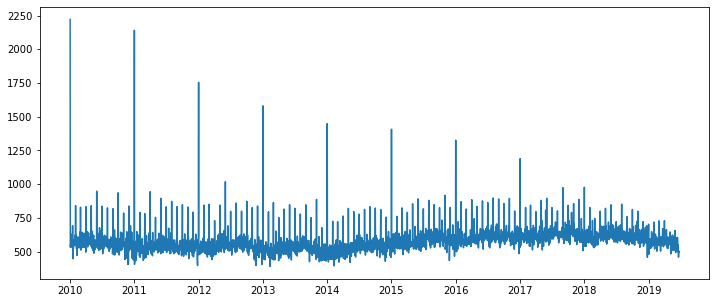

In [7]:
# plot of daily totals
plt.figure(figsize=(12,5))
plt.plot(df);

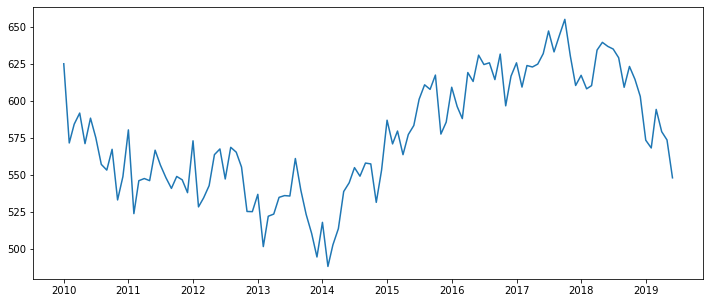

In [8]:
# plot of monthly mean
plt.figure(figsize=(12,5))
plt.plot(month_mean);

## Autocorrelation Plot

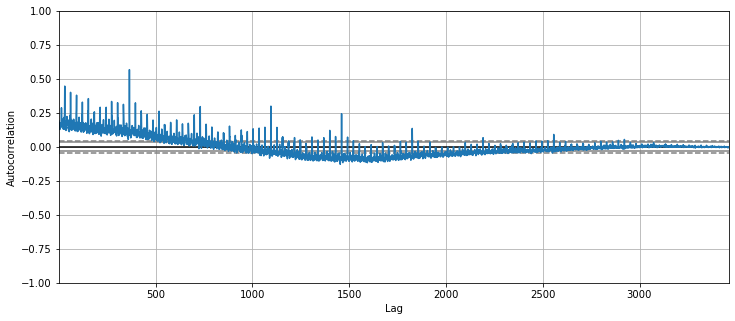

In [9]:
# daily ACF plot
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df);

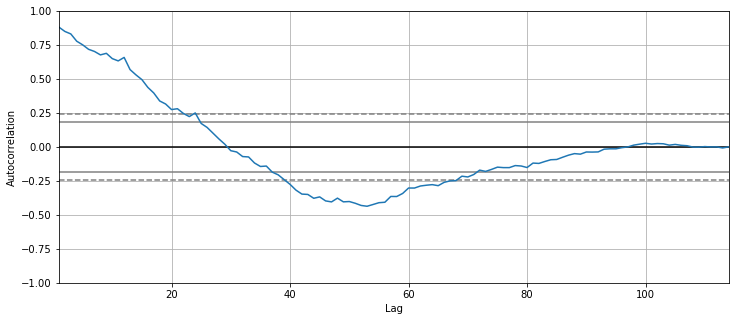

In [10]:
# monthly mean ACF plot
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(month_mean);

## Detrending Data

In [11]:
df_diff = df.diff(periods=1)

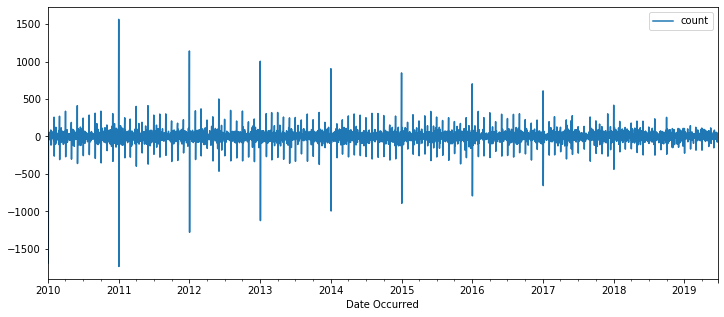

In [12]:
df_diff.plot(figsize=(12,5));

In [13]:
month_mean_diff = month_mean.diff(periods=1)

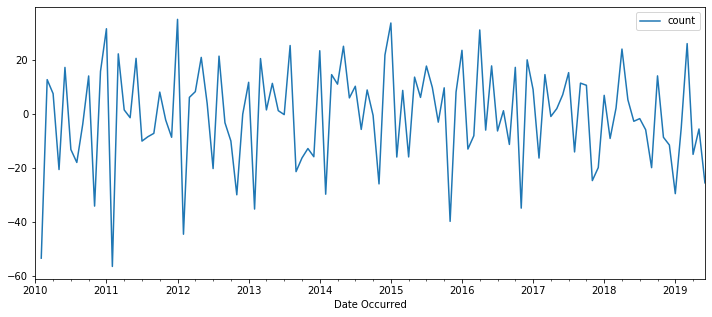

In [14]:
month_mean_diff.plot(figsize=(12,5));

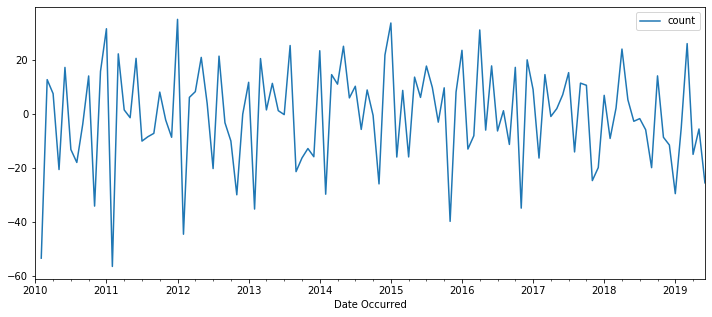

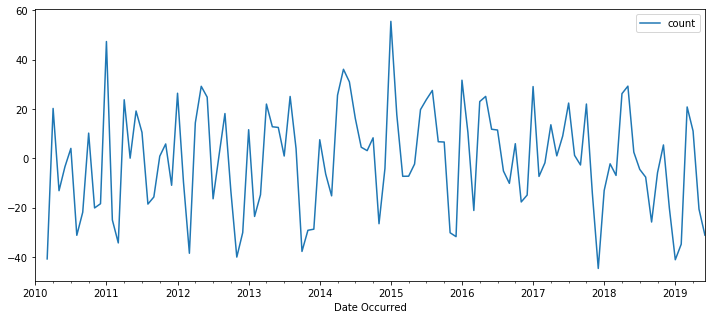

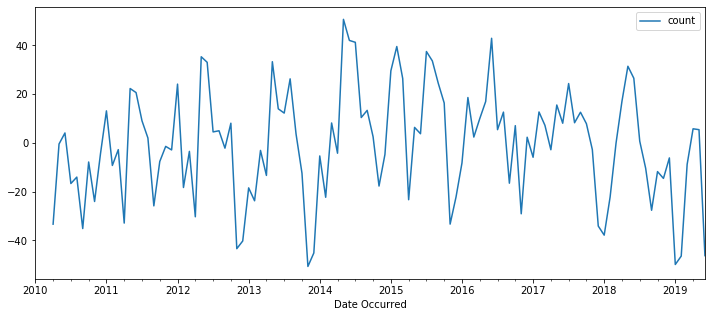

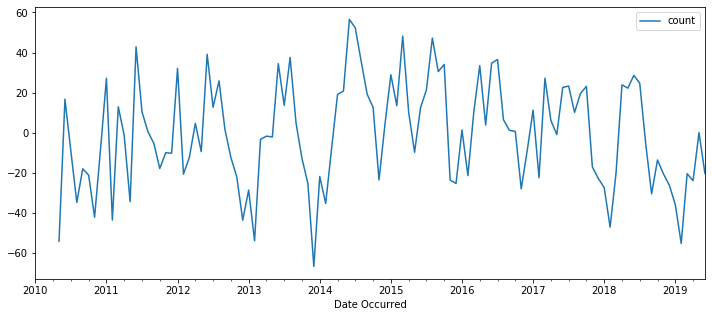

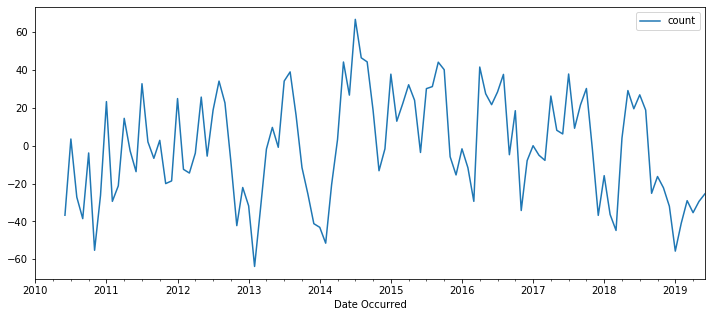

In [90]:
for i in range(1,6):
    diff = month_mean.diff(periods=i)
    diff.plot(figsize=(12,5))

## Autocorrelation plot of Differenced Data

In [17]:
df_diff = df_diff.dropna()

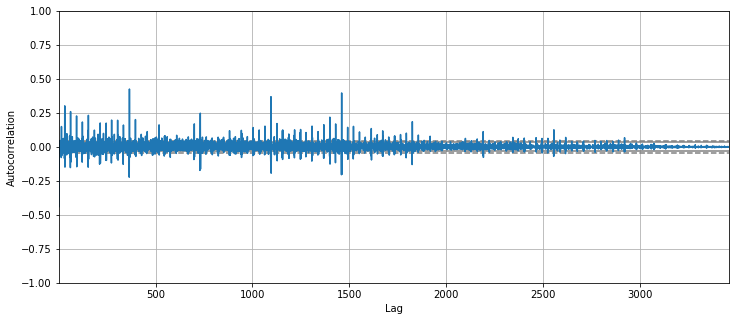

In [18]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df_diff);

In [19]:
month_mean_diff = month_mean_diff.dropna()

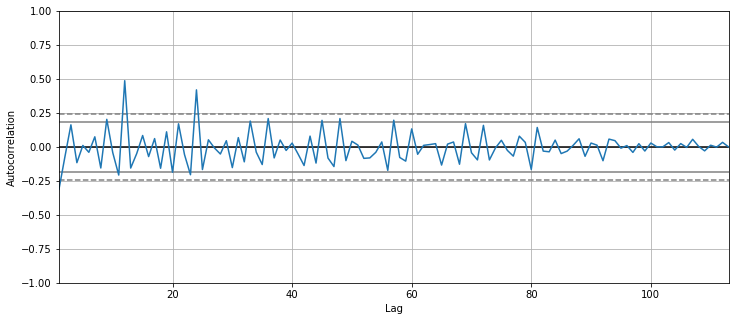

In [20]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(month_mean_diff);

# PACF & ACF
"Running the example creates a 2D plot showing the lag value along the x-axis and the correlation on the y-axis between -1 and 1.

Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke." -Jason Brownlee (Gentle Intro to ACF & PACF)

In [79]:
crime_shift_1 = month_mean_diff.shift(periods=1)
crime_shift_1.head()

,count
Date Occurred,
2010-02-01,NaN
2010-03-01,-53.542627
2010-04-01,12.703917
2010-05-01,7.503226
2010-06-01,-20.664516


In [80]:
lag_1 = pd.concat([crime_shift_1, month_mean_diff], axis=1)
lag_1.corr()

,count,count
count,1.000000,-0.327326
count,-0.327326,1.000000


In [81]:
crime_shift_12 = month_mean_diff.shift(periods=12)
crime_shift_12.head()

,count
Date Occurred,
2010-02-01,NaN
2010-03-01,NaN
2010-04-01,NaN
2010-05-01,NaN
2010-06-01,NaN


In [82]:
lag_12 = pd.concat([crime_shift_12, month_mean_diff], axis=1)
lag_12.corr()

,count,count
count,1.000000,0.559578
count,0.559578,1.000000


In [83]:
crime_shift_13 = month_mean_diff.shift(periods=13)
crime_shift_13.head()

,count
Date Occurred,
2010-02-01,NaN
2010-03-01,NaN
2010-04-01,NaN
2010-05-01,NaN
2010-06-01,NaN


In [84]:
lag_13 = pd.concat([crime_shift_13, month_mean_diff], axis=1)
lag_13.corr()

,count,count
count,1.000000,-0.191027
count,-0.191027,1.000000


### ACF

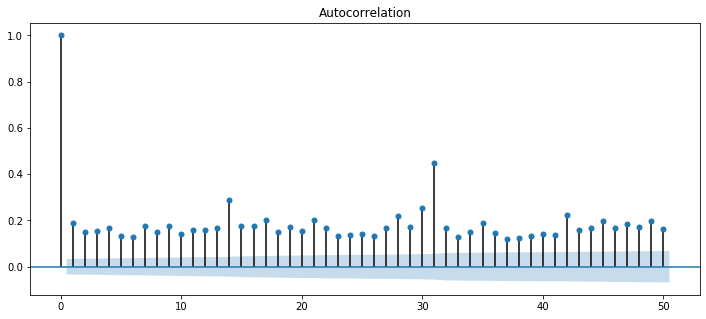

In [78]:
# acf
rcParams['figure.figsize'] = 12, 5
plot_acf(df, lags=50);

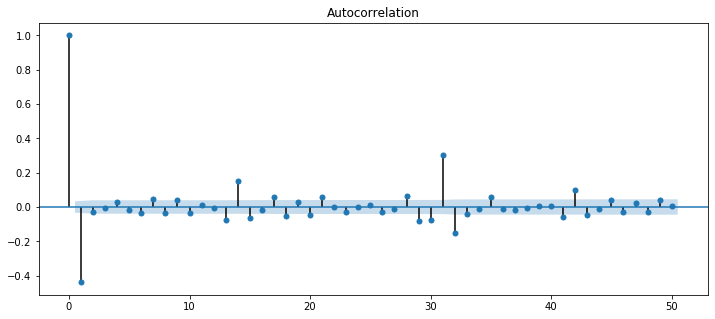

In [34]:
# acf diff
rcParams['figure.figsize'] = 12, 5
plot_acf(df_diff, lags=50);

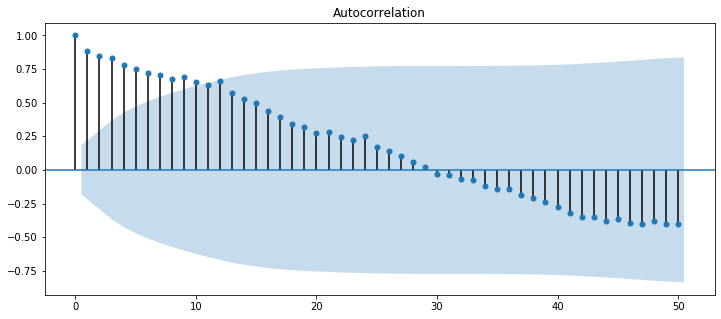

In [76]:
# acf month
rcParams['figure.figsize'] = 12, 5
plot_acf(month_mean, lags=50);

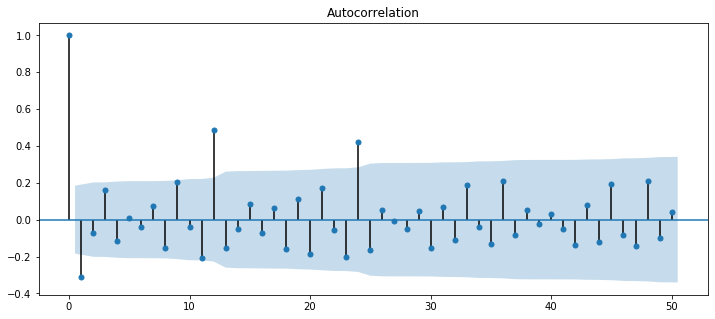

In [86]:
# acf month diff
rcParams['figure.figsize'] = 12, 5
plot_acf(month_mean_diff, lags=50);

### PACF
"The partial autocorrelation function can be interpreted as a regression of the series against its past lags. It helps you come up with a possible order for the auto regressive term. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant." (Correlation and Autocorrelation in TS)

"A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed." -Jason Brownlee

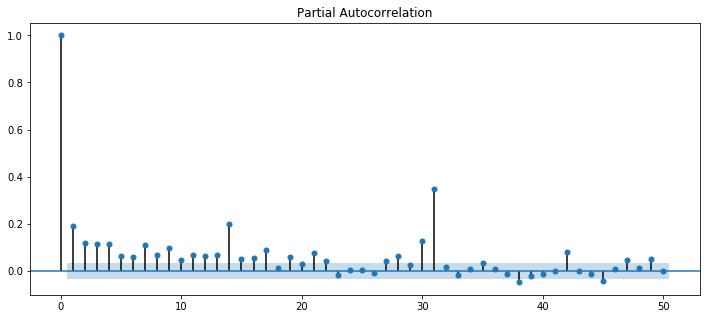

In [60]:
# pacf 
rcParams['figure.figsize'] = 12, 5
plot_pacf(df, lags=50);

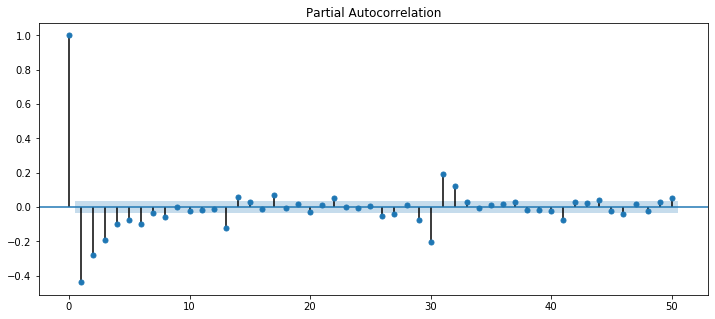

In [61]:
# pacf diff
rcParams['figure.figsize'] = 12, 5
plot_pacf(df_diff, lags=50);

/Users/davidbruce/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


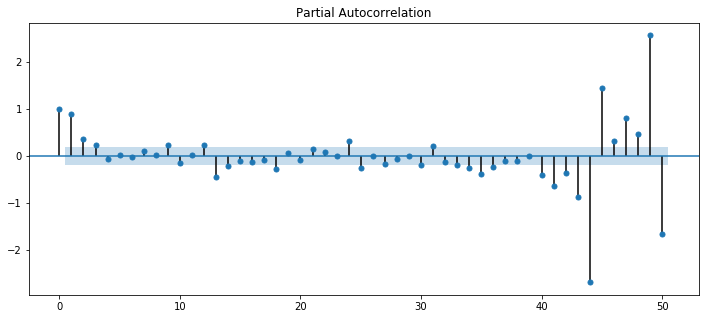

In [62]:
# pacf month
rcParams['figure.figsize'] = 12, 5
plot_pacf(month_mean, lags=50);

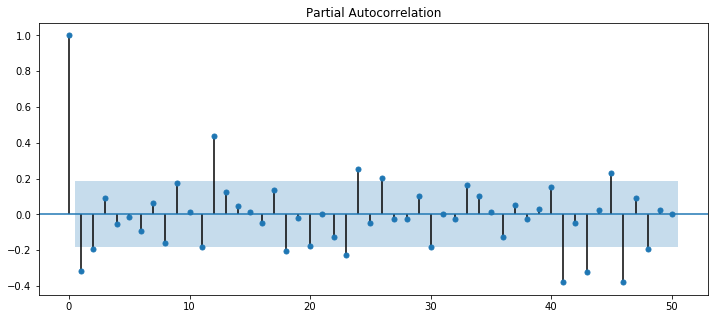

In [63]:
# pacf month diff
rcParams['figure.figsize'] = 12, 5
plot_pacf(month_mean_diff, lags=50);

# ARMA Models in `statsmodels`

In [102]:
mod_arma = ARMA(month_mean_diff, order=(12,0))
res_arma = mod_arma.fit()

print(res_arma.summary())
# print(res_arma.score())

                              ARMA Model Results                              
Dep. Variable:                  count   No. Observations:                  113
Model:                    ARMA(12, 0)   Log Likelihood                -463.813
Method:                       css-mle   S.D. of innovations             14.385
Date:                Sat, 05 Dec 2020   AIC                            955.625
Time:                        17:10:43   BIC                            993.809
Sample:                    02-01-2010   HQIC                           971.120
                         - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8728      1.453     -0.601      0.548      -3.720       1.975
ar.L1.count     -0.2630      0.086     -3.043      0.002      -0.432      -0.094
ar.L2.count     -0.1382      0.090     -1.53

In [101]:
mod_arma = ARMA(month_mean_diff, order=(12,1))
res_arma = mod_arma.fit()

print(res_arma.summary())
# print(res_arma.score())

                              ARMA Model Results                              
Dep. Variable:                  count   No. Observations:                  113
Model:                    ARMA(12, 1)   Log Likelihood                -462.578
Method:                       css-mle   S.D. of innovations             14.205
Date:                Sat, 05 Dec 2020   AIC                            955.157
Time:                        17:10:00   BIC                            996.068
Sample:                    02-01-2010   HQIC                           971.758
                         - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5365      2.139     -0.718      0.473      -5.728       2.655
ar.L1.count      0.0073      0.169      0.043      0.965      -0.323       0.338
ar.L2.count     -0.0427      0.096     -0.44

In [99]:
mod_arma = ARMA(month_mean_diff, order=(12,2))
res_arma = mod_arma.fit()

print(res_arma.summary())
# print(res_arma.score())

                              ARMA Model Results                              
Dep. Variable:                  count   No. Observations:                  113
Model:                    ARMA(12, 2)   Log Likelihood                -462.563
Method:                       css-mle   S.D. of innovations             14.203
Date:                Sat, 05 Dec 2020   AIC                            957.125
Time:                        17:07:18   BIC                           1000.763
Sample:                    02-01-2010   HQIC                           974.833
                         - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5734      2.176     -0.723      0.470      -5.839       2.692
ar.L1.count      0.0012      0.165      0.007      0.994      -0.323       0.325
ar.L2.count     -0.0209      0.152     -0.13

AttributeError: 'ARMAResults' object has no attribute 'score'

In [100]:
mod_arma = ARMA(month_mean_diff, order=(1,1))
res_arma = mod_arma.fit()

print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                  count   No. Observations:                  113
Model:                     ARMA(1, 1)   Log Likelihood                -483.043
Method:                       css-mle   S.D. of innovations             17.374
Date:                Sat, 05 Dec 2020   AIC                            974.086
Time:                        17:09:31   BIC                            984.996
Sample:                    02-01-2010   HQIC                           978.513
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4125      0.987     -0.418      0.676      -2.348       1.523
ar.L1.count    -0.0116      0.235     -0.049      0.961      -0.472       0.448
ma.L1.count    -0.3940      0.214     -1.840    

In [97]:
mod_arma = ARMA(month_mean_diff, order=(24,0))
res_arma = mod_arma.fit()

print(res_arma.summary())

KeyboardInterrupt: 

In [108]:
mod_arima = ARIMA(month_mean, order=(12,1,1))
res_arima = mod_arima.fit()

print(res_arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                  113
Model:                ARIMA(12, 1, 1)   Log Likelihood                -462.578
Method:                       css-mle   S.D. of innovations             14.205
Date:                Sat, 05 Dec 2020   AIC                            955.157
Time:                        17:18:33   BIC                            996.068
Sample:                    02-01-2010   HQIC                           971.758
                         - 06-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5365      2.139     -0.718      0.473      -5.728       2.655
ar.L1.D.count      0.0073      0.169      0.043      0.965      -0.323       0.338
ar.L2.D.count     -0.0427      0.096

In [107]:
mod_arima = ARIMA(month_mean, order=(12,2,1))
res_arima = mod_arima.fit()

print(res_arima.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.count   No. Observations:                  112
Model:                ARIMA(12, 2, 1)   Log Likelihood                -460.764
Method:                       css-mle   S.D. of innovations             14.323
Date:                Sat, 05 Dec 2020   AIC                            951.529
Time:                        17:18:08   BIC                            992.306
Sample:                    03-01-2010   HQIC                           968.074
                         - 06-01-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0209      0.089     -0.235      0.814      -0.196       0.154
ar.L1.D2.count     -0.8047      0.330     -2.441      0.015      -1.451      -0.159
ar.L2.D2.count     -0.7821      

In [109]:
mod_arima = ARIMA(month_mean_diff, order=(12,2,1))
res_arima = mod_arima.fit()

print(res_arima.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.count   No. Observations:                  111
Model:                ARIMA(12, 2, 1)   Log Likelihood                -460.485
Method:                       css-mle   S.D. of innovations             14.170
Date:                Sat, 05 Dec 2020   AIC                            950.970
Time:                        17:21:14   BIC                            991.613
Sample:                    04-01-2010   HQIC                           967.458
                         - 06-01-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0072      0.003     -2.090      0.037      -0.014      -0.000
ar.L1.D2.count     -1.3119      0.094    -13.934      0.000      -1.496      -1.127
ar.L2.D2.count     -1.3948      